In [ ]:
import plotly.express as px
import pandas as pd

data = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin1')


country_data = data.groupby('Country').agg({'subscribers': 'sum', 'video views': 'sum'}).reset_index()


fig = px.choropleth(country_data, locations='Country', locationmode='country names', color='subscribers',
                    hover_name='Country', projection='natural earth',
                    title='Total Subscribers by Country')
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/Global YouTube Statistics.csv",encoding="latin-1")
df_cleaned = df.replace('nan', pd.NA)  # Replace 'nan' with pandas' NA for numeric columns
numeric_columns = ['rank', 'subscribers', 'video views', 'video_views_for_the_last_30_days',
                   'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
                   'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'Unemployment rate']
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

df_cleaned = df_cleaned.dropna()

top_10_subscribers = df_cleaned.nlargest(10, 'subscribers')

fig1 = px.bar(top_10_subscribers, x='subscribers', y='Youtuber', orientation='h', text='subscribers',
              color='subscribers', labels={'subscribers': 'Subscribers (in billions)'},
              color_continuous_scale='Viridis')
fig1.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5,
                    opacity=0.8, textposition='inside')
fig1.update_layout(title_text='Top 10 YouTube Channels by Subscribers', yaxis_title='YouTube Channel',
                   xaxis_title='Subscribers (in billions)', height=500)
fig1.show()

In [ ]:
fig1 = go.Figure(data=go.Scatter3d(
    x=df_cleaned['subscribers'],
    y=df_cleaned['video views'],
    z=df_cleaned['uploads'],
    mode='markers',
    marker=dict(
        size=8,
        color=df_cleaned['video_views_for_the_last_30_days'],
        colorscale='Viridis',
        opacity=0.7
    )
))

fig1.update_layout(title='YouTube Channels: Subscribers, Video Views, and Uploads',
                   scene=dict(xaxis_title='x=Subscribers', yaxis_title='y=Video Views', zaxis_title='z=Uploads'),
                   margin=dict(l=0, r=0, b=0, t=30))
fig1.show()

In [ ]:
#  Scatter plot for subscribers vs. video views with size and color encoding
fig3 = px.scatter(df_cleaned, x='subscribers', y='video views', size='video_views_for_the_last_30_days',
                  color='category', hover_name='Youtuber', hover_data=['Country'], size_max=40,
                  labels={'subscribers': 'Subscribers ', 'video views': 'Video Views'},
                  color_discrete_sequence=px.colors.qualitative.Set2)
fig3.update_layout(title_text='Subscribers vs. Video Views by Category', xaxis_type='log', yaxis_type='log')
fig3.show()

Popular Categories: Determine which categories or niches have the highest number of channels and subscribers.

In [ ]:
import pandas as pd


df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin1')

# Group DataFrame by category and aggregate number of channels and total subscribers
category_stats = df.groupby('category').agg(
    num_channels=('Youtuber', 'nunique'),
    total_subscribers=('subscribers', 'sum')
).sort_values(by='total_subscribers', ascending=False)

# Display top categories by number of channels and total subscribers
print("Top categories by number of channels:")
print(category_stats.sort_values(by='num_channels', ascending=False).head())

print("\nTop categories by total subscribers:")
print(category_stats.head())


Top categories by number of channels:
                num_channels  total_subscribers
category                                       
Entertainment            241         5158200000
Music                    202         5195000000
People & Blogs           132         2779400000
Gaming                    94         1960100000
Comedy                    69         1388500000

Top categories by total subscribers:
                num_channels  total_subscribers
category                                       
Music                    202         5195000000
Entertainment            241         5158200000
People & Blogs           132         2779400000
Gaming                    94         1960100000
Comedy                    69         1388500000


In [ ]:
import pandas as pd
import plotly.express as px


df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin1')

# Group DataFrame by channel type and count the number of channels, total views, and total subscribers in each channel type
channel_type_info = df.groupby('channel_type').agg(
    num_channels=('Youtuber', 'count'),
    total_views=('video views', 'sum'),
    total_subscribers=('subscribers', 'sum')
).reset_index()

# Plotting a sunburst chart
fig = px.sunburst(channel_type_info,
                  path=['channel_type'],
                  values='num_channels',
                  color='channel_type',
                  color_discrete_sequence=px.colors.qualitative.Set3,
                  title='Distribution of YouTube Channel Types/Categories',
                  hover_data={'num_channels': True, 'total_views': True, 'total_subscribers': True},
                  labels={'num_channels': 'Number of Channels', 'total_views': 'Total Views', 'total_subscribers': 'Total Subscribers'})

fig.update_layout(height=500)
fig.show()


Earnings Analysis: Investigate the estimated earnings of YouTube channels across different countires by analyzing the lowest and highest estimated monthly and yearly earnings.

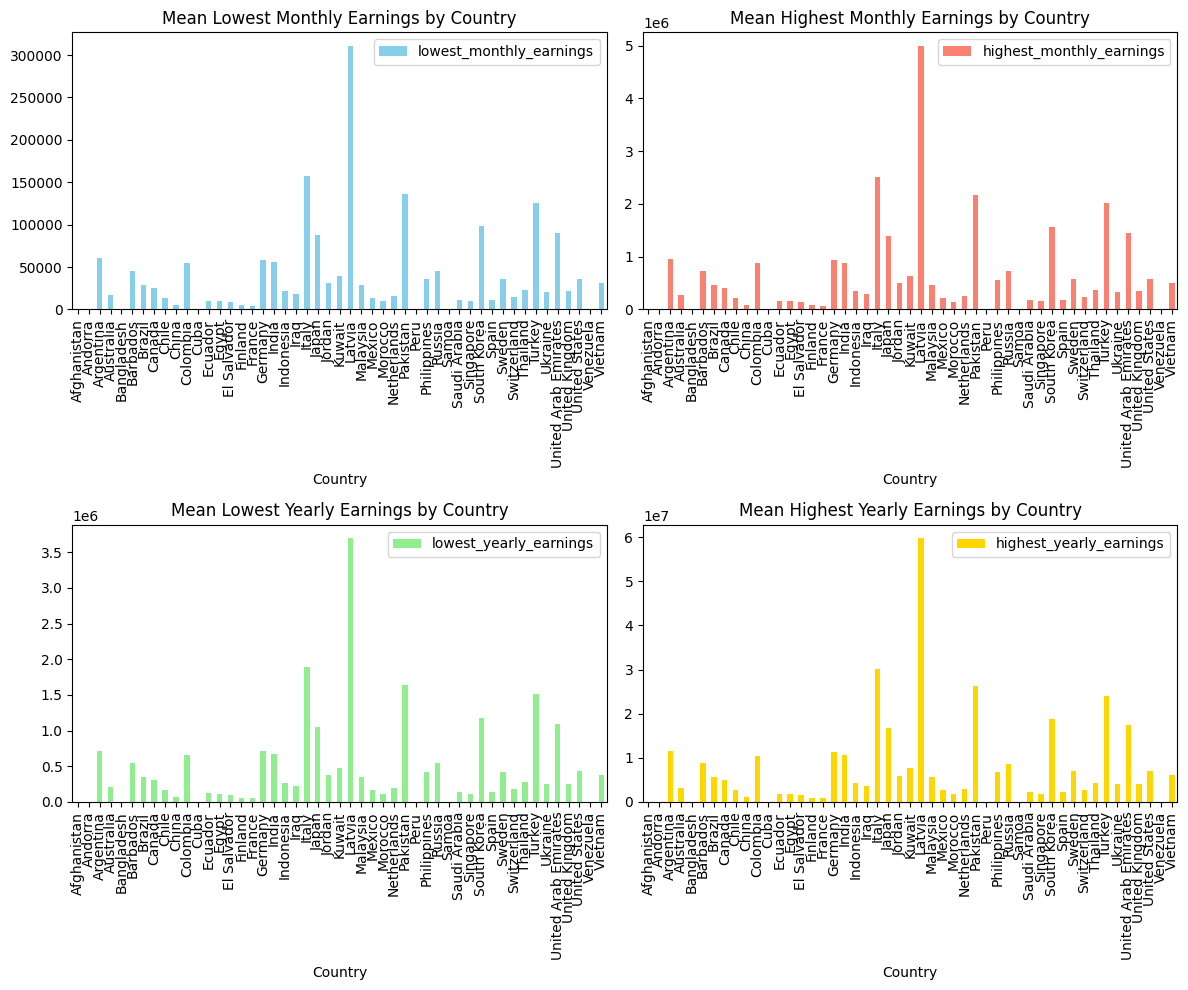

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin1')

# Get unique countries
unique_countries = df[['Country']].drop_duplicates()

# Group DataFrame by country and channel type and calculate aggregate statistics for earnings
earnings_stats = df.groupby(['Country']).agg(
    lowest_monthly_earnings=('lowest_monthly_earnings', 'mean'),
    highest_monthly_earnings=('highest_monthly_earnings', 'mean'),
    lowest_yearly_earnings=('lowest_yearly_earnings', 'mean'),
    highest_yearly_earnings=('highest_yearly_earnings', 'mean')
).reset_index()

# Plotting earnings by country and channel type
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

earnings_stats.plot(kind='bar', x='Country', y='lowest_monthly_earnings', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Mean Lowest Monthly Earnings by Country')

earnings_stats.plot(kind='bar', x='Country', y='highest_monthly_earnings', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Mean Highest Monthly Earnings by Country')

earnings_stats.plot(kind='bar', x='Country', y='lowest_yearly_earnings', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Mean Lowest Yearly Earnings by Country')

earnings_stats.plot(kind='bar', x='Country', y='highest_yearly_earnings', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Mean Highest Yearly Earnings by Country')

plt.tight_layout()
plt.show()


correlation:-


 Each cell in the matrix represents the correlation coefficient between two variables, where:


*  1.00: Perfect positive correlation (both variables increase together)
*  0.00: No correlation
* -1.00: Perfect negative correlation (one variable increases as the other decreases)



how to interpret the correlation matrix:

**Diagonal Cells (Top-left to Bottom-right)**: These cells represent the correlation of each variable with itself, which is always 1.00 (perfect positive correlation).

**Off-diagonal Cells**: These cells represent the correlation between pairs of variables. Each cell shows the correlation coefficient between the variable in the corresponding row and the variable in the corresponding column.

**Heatmap Coloring**:-
 The color of each cell in the heatmap indicates the strength and direction of the correlation:

Darker shades (e.g., dark blue or dark red) indicate stronger correlations, either positive or negative.

Lighter shades (e.g., light blue or light red) indicate weaker correlations, closer to zero.

Positive correlations are typically represented in shades of red, while negative correlations are represented in shades of blue.



**Annotation Values:** The numbers within each cell represent the correlation coefficient. These values range from -1.00 to 1.00, indicating the strength and direction of the correlation between the corresponding pair of variables. for eg:-
A correlation coefficient of 0.08 indicates a very weak positive correlation between the two variables.

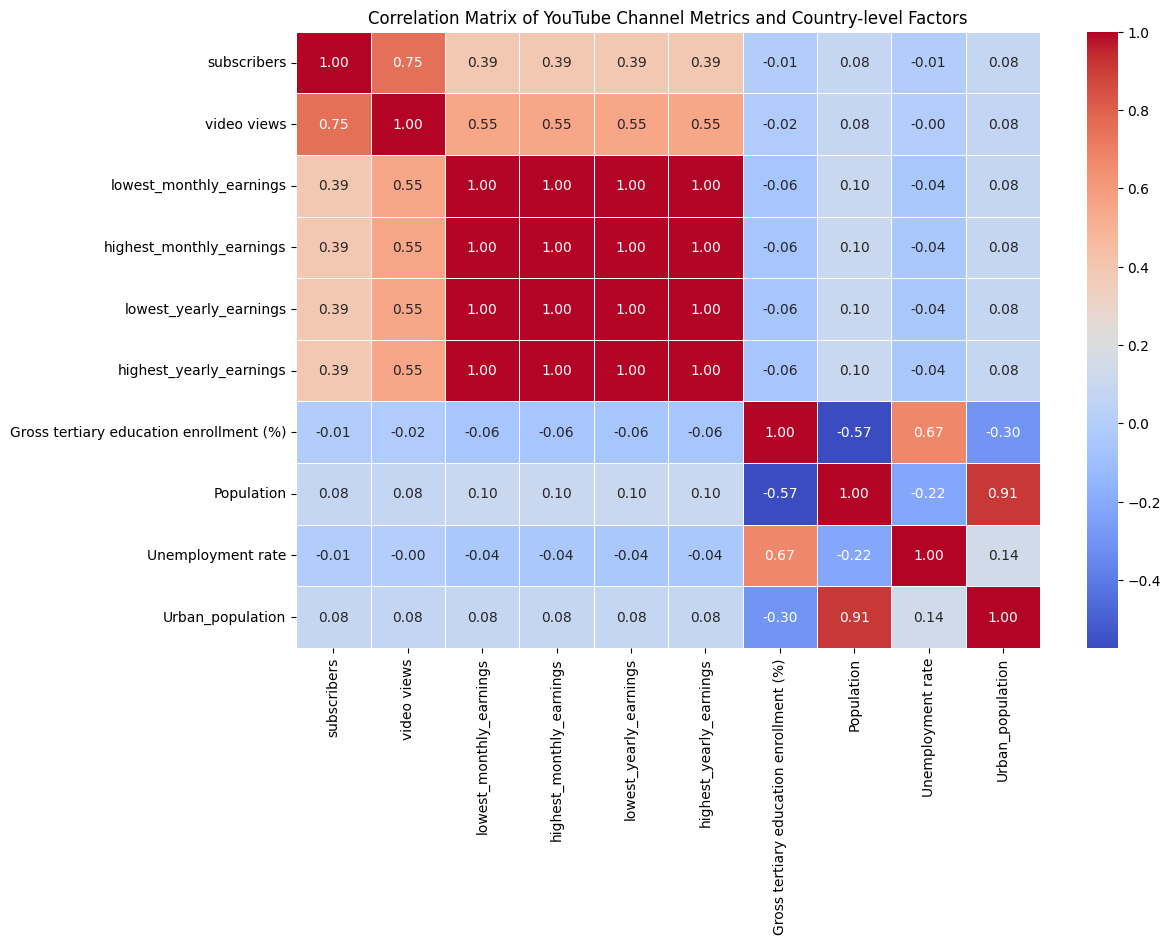

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin1')



# here we select columns for correlation analysis
columns_of_interest = ['subscribers', 'video views', 'lowest_monthly_earnings', 'highest_monthly_earnings',
                       'lowest_yearly_earnings', 'highest_yearly_earnings', 'Gross tertiary education enrollment (%)',
                       'Population', 'Unemployment rate', 'Urban_population']

# Compute correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of YouTube Channel Metrics and Country-level Factors')
plt.show()
